In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from locale import normalize
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
data = pd.read_excel ('/content/data01.xlsx')
data

,Order ID,Order Date,Ship Date,Status,Customer Name,EmailID,Geography,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,On time,DarrinVanHuff,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,Delay,BrosinaHoffman,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,Delay,BrosinaHoffman,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",United States,Los Angeles,California,Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,Delay,BrosinaHoffman,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,Delay,BrosinaHoffman,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-10-04,On time,MarisLaWare,MarisLaWare@gmail.com,"United States,Los Angeles,California",United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,15.2208
3199,CA-2014-121258,2014-02-27,2014-03-04,Delay,DaveBrooks,DaveBrooks@gmail.com,"United States,Costa Mesa,California",United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
3200,CA-2014-121258,2014-02-27,2014-03-04,Delay,DaveBrooks,DaveBrooks@gmail.com,"United States,Costa Mesa,California",United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.576,2,19.3932
3201,CA-2014-121258,2014-02-27,2014-03-04,Delay,DaveBrooks,DaveBrooks@gmail.com,"United States,Costa Mesa,California",United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


In [ ]:
file_path = '/content/data01.xlsx'
data = pd.read_excel('/content/data01.xlsx' )
filtered_data = data[['Ship Date', 'Quantity']]
aggregated_data = filtered_data.groupby('Ship Date', as_index=False).sum()
aggregated_data.to_excel("aggregated_data.xlsx", index=False)
print("Aggregated data saved to 'aggregated_data.xlsx'.")

Aggregated data saved to 'aggregated_data.xlsx'.


In [ ]:
sales = pd.read_excel ('aggregated_data.xlsx')
sales

,Ship Date,Quantity
0,2011-01-09,3
1,2011-01-19,13
2,2011-01-21,24
3,2011-01-22,4
4,2011-01-26,4
...,...,...
906,2015-01-01,21
907,2015-01-02,6
908,2015-01-03,20
909,2015-01-04,7


In [ ]:
aggregated_data.rename(columns={'Ship Date': 'Date', 'Quantity': 'Qty'}, inplace=True)

In [ ]:
print(aggregated_data.columns)

Index(['Date', 'Qty'], dtype='object')


NameError: name 'mdates' is not defined

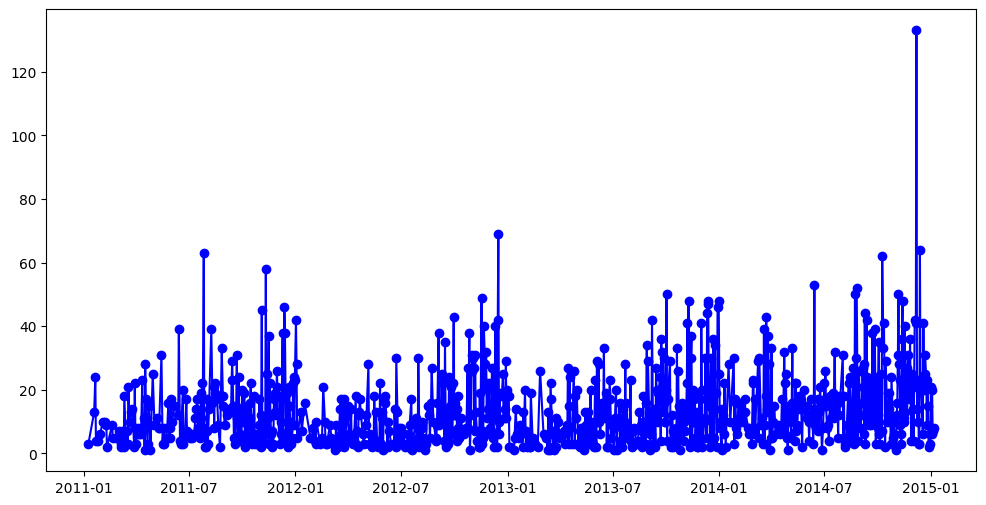

In [ ]:


# Ensure the 'Date' column is in datetime format
sales['Date'] = pd.to_datetime(sales['Date'])

# Set up the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(sales['Date'], sales['Qty'], marker='o', linestyle='-', color='b', label='Total Quantity')
# Format x-axis ticks with proper date formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and adjust x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Add title and axis labels
plt.title('Original Graph: Date vs Total Quantity', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)

# Add grid lines for better readability
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


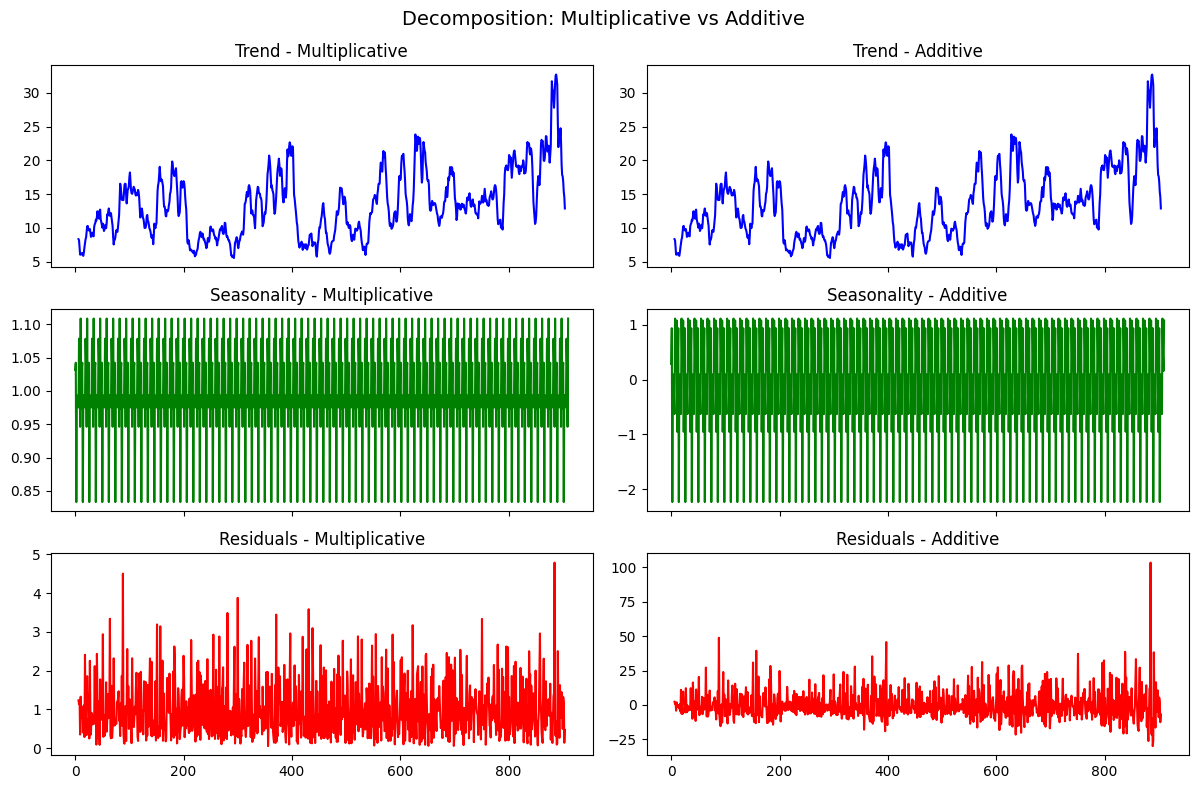

In [ ]:
sales = sales.sort_values(by='Date').reset_index(drop=True)

# Perform seasonal decomposition for both multiplicative and additive models
res_decompose_multiplicative = seasonal_decompose(aggregated_data['Qty'], model='multiplicative', period=12)
res_decompose_additive = seasonal_decompose(aggregated_data['Qty'], model='additive', period=12)

# Plot the decomposition results
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 8), sharex=True)

# Multiplicative decomposition
res_decompose_multiplicative.trend.plot(ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Trend - Multiplicative', fontsize=12)
res_decompose_multiplicative.seasonal.plot(ax=axs[1, 0], color='green')
axs[1, 0].set_title('Seasonality - Multiplicative', fontsize=12)
res_decompose_multiplicative.resid.plot(ax=axs[2, 0], color='red')
axs[2, 0].set_title('Residuals - Multiplicative', fontsize=12)

# Additive decomposition
res_decompose_additive.trend.plot(ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Trend - Additive', fontsize=12)
res_decompose_additive.seasonal.plot(ax=axs[1, 1], color='green')
axs[1, 1].set_title('Seasonality - Additive', fontsize=12)
res_decompose_additive.resid.plot(ax=axs[2, 1], color='red')
axs[2, 1].set_title('Residuals - Additive', fontsize=12)

# General settings
fig.suptitle('Decomposition: Multiplicative vs Additive', fontsize=14)
fig.tight_layout()
plt.show()


<ipython-input-30-454fb51d0306>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=aggregated_data['Date'].iloc[-1], periods=12, freq='M')


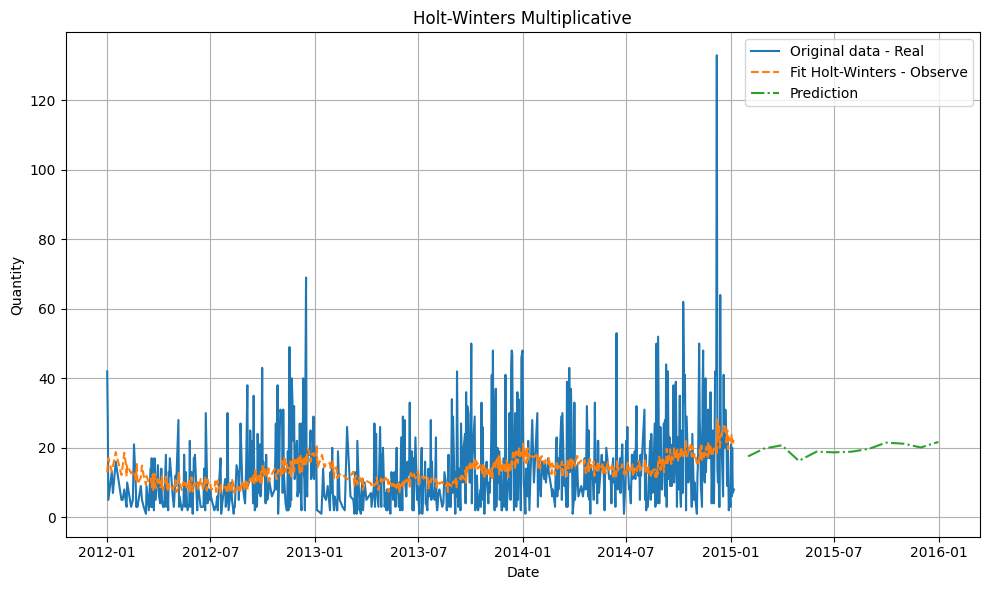

In [ ]:
model = ExponentialSmoothing(aggregated_data['Qty'], seasonal="multiplicative", seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['Date'][200:], aggregated_data['Qty'][200:], label="Original data - Real")
plt.plot(aggregated_data['Date'][200:], fit.fittedvalues[200:], label="Fit Holt-Winters - Observe", linestyle="--")
forecast_dates = pd.date_range(start=aggregated_data['Date'].iloc[-1], periods=12, freq='M')
plt.plot(forecast_dates, forecast, label="Prediction", linestyle="-.")
plt.title("Holt-Winters Multiplicative")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()